In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import statsmodels.api as sm

from ISLP import load_data

from ISLP.models import (ModelSpec as MS,
                        summarize)

## a) 

In [5]:
rng = np.random.default_rng(10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

y = 2 + 2x1 + 0.3x2 + e

B0 = 2

B1 = 2

B2 = 0.3

## b)

In [6]:
sns.scatterplot(x='x1', y='x2', data=df)

plt.title('Relation between x1 and x2')

plt.show()

NameError: name 'df' is not defined

## c)

In [ ]:
df = pd.DataFrame({"x1": x1, "x2":x2 ,"y": y})

X = MS(['x1', 'x2']).fit_transform(df)

y = df.y

result = sm.OLS(y, X).fit()

summarize(result)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


The intercept and the B0 coefficient has similar values compared to the real function, but the B2 is the triple of the real coefficient.
Also, B2 has a high p-value, so we can't discard the null hypothesis.

## d)

In [ ]:
X = MS(["x1"]).fit_transform(df)

y = df.y

result = sm.OLS(y, X).fit()

summarize(result)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


Using only the x1, the B0 coefficient is much closer to the coefficient real value and the p-value is very low, so the null hypothesis can be rejected.

## e)

In [ ]:
X = MS(["x2"]).fit_transform(df)

y = df.y

result = sm.OLS(y, X).fit()

summarize(result)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


## f)

The result don't contradict each other. It's just the collinearity between x1 and x2 that are causing the different results.


## g)

In [15]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])

In [16]:
df = pd.DataFrame({"x1": x1, "x2":x2 ,"y": y})

X = MS(['x1', 'x2']).fit_transform(df)

y = df.y

result = sm.OLS(y, X).fit()

summarize(result)

,coef,std err,t,P>|t|
intercept,2.0618,0.192,10.720,0.000
x1,0.8575,0.466,1.838,0.069
x2,2.2663,0.705,3.216,0.002


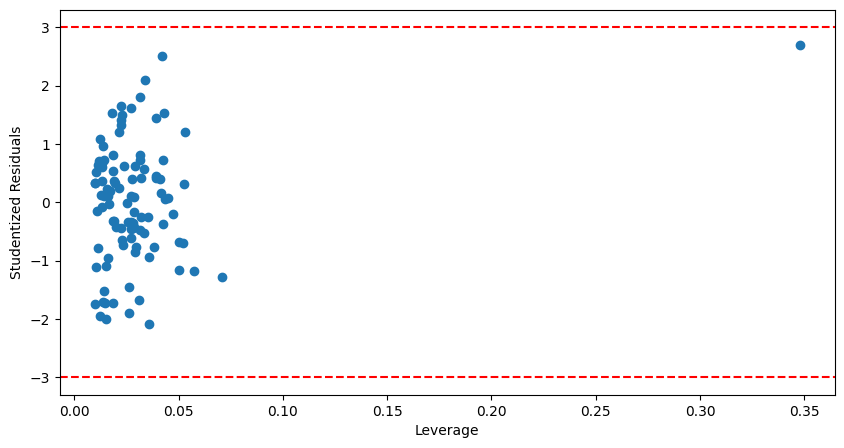

In [17]:
# Outliers and Leverage

ax = plt.subplots(figsize=(10,5))[1]
ax.scatter(result.get_influence().hat_matrix_diag, result.get_influence().resid_studentized_internal)
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')

ax.axhline(y=3, color='red', linestyle='--', label='Constant Line')
ax.axhline(y=-3, color='red', linestyle='--', label='Constant Line')

plt.show()

In [18]:
X = MS(["x1"]).fit_transform(df)

y = df.y

result = sm.OLS(y, X).fit()

summarize(result)

,coef,std err,t,P>|t|
intercept,2.0739,0.201,10.310,0.0
x1,1.8760,0.358,5.236,0.0


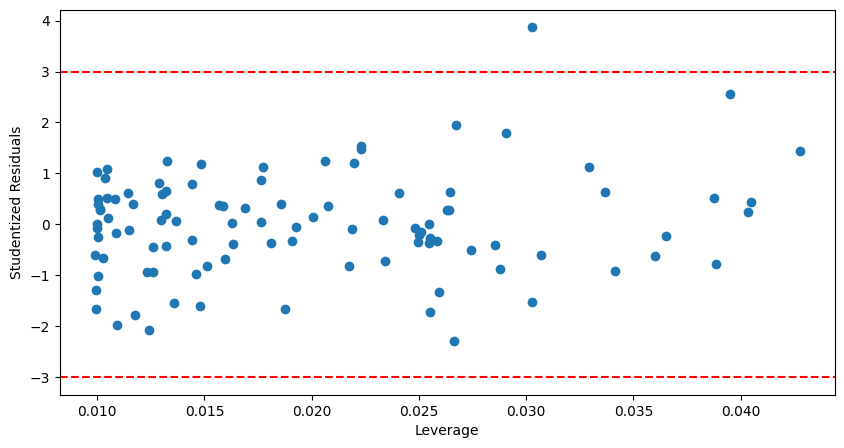

In [19]:
# Outliers and Leverage

ax = plt.subplots(figsize=(10,5))[1]
ax.scatter(result.get_influence().hat_matrix_diag, result.get_influence().resid_studentized_internal)
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')

ax.axhline(y=3, color='red', linestyle='--', label='Constant Line')
ax.axhline(y=-3, color='red', linestyle='--', label='Constant Line')

plt.show()

In [20]:
X = MS(["x2"]).fit_transform(df)

y = df.y

result = sm.OLS(y, X).fit()

summarize(result)

,coef,std err,t,P>|t|
intercept,2.2840,0.151,15.088,0.0
x2,3.1458,0.524,6.008,0.0


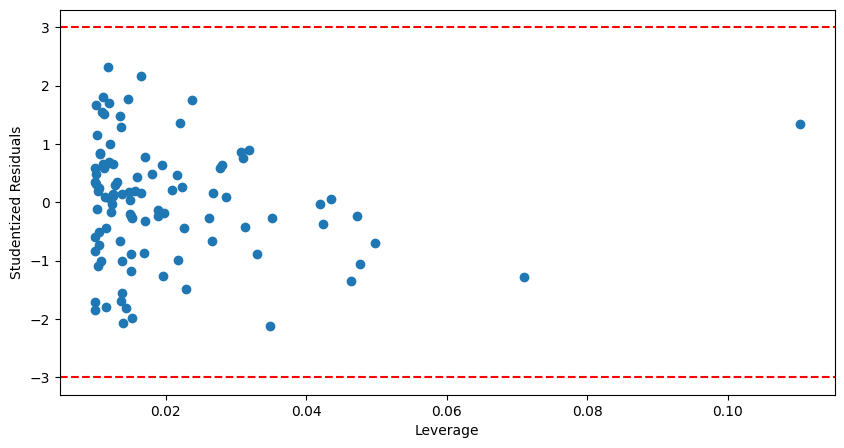

In [21]:
# Outliers and Leverage

ax = plt.subplots(figsize=(10,5))[1]
ax.scatter(result.get_influence().hat_matrix_diag, result.get_influence().resid_studentized_internal)
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')

ax.axhline(y=3, color='red', linestyle='--', label='Constant Line')
ax.axhline(y=-3, color='red', linestyle='--', label='Constant Line')

plt.show()